In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('insurance_data.xlsx')

In [3]:
# one-hot编码
df = pd.get_dummies(df, columns=['gender', 'policy_type'], drop_first=True)

In [4]:
X = df.drop('churn', axis=1)
# axis=1 表示在列的维度上删除，而如果是 axis=0，表示在行的维度上删除
y = df['churn']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.2, random_state=42))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
# 标准化特征向量
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

# 逻辑回归的原理

## **1. 模型概述**
逻辑回归是一种用于二分类问题的模型，用于预测某事件发生的概率。

## **2. 模型公式**
逻辑回归的核心是**Sigmoid函数**：

$$
p(y = 1 \mid X) = \sigma(w^T X + b) = \frac{1}{1 + e^{-(w^T X + b)}}
$$

$$
\text{p}(y = 1 \mid X)：\text{样本属于正类的概率  } \\
w：\text{特征权重向量  } \\
X：\text{输入特征向量  } \\
b：\text{偏置项}
$$

## **3. 损失函数**
逻辑回归使用**对数损失函数（Log Loss）**：

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

$$
N：\text{样本数量  } \\
y_i：\text{第 } i \text{ 个样本的真实标签（0 或 1）  } \\
\hat{y}_i：\text{第 } i \text{ 个样本的预测概率  }
$$

## **4. 梯度下降优化**
通过梯度下降法更新参数 \( w \)，以最小化损失函数：

$$
w := w - \alpha \cdot \frac{\partial L}{\partial w}
$$

$$
\alpha：\text{学习率  } \\
\frac{\partial L}{\partial w}：\text{损失函数关于 } w \text{ 的梯度}
$$

## **5. 正则化**
逻辑回归通过正则化防止过拟合：

- **L1 正则化**：加入 \( \lambda \sum |w_i| \) 项  
- **L2 正则化**：加入 \( \lambda \sum w_i^2 \) 项

## **6. 应用场景**
逻辑回归广泛用于**客户流失预测**、**信用评分**、**医学诊断**等领域。

In [14]:
# 初始化逻辑回归模型，包含所有参数（使用默认值）
model = LogisticRegression(
    penalty='l2',            # 正则化方式，默认L2正则化
    dual=False,              # 对于样本数大于特征数时应为False
    tol=1e-4,                # 容差
    C=1.0,                   # 正则化强度的倒数
    fit_intercept=True,       # 是否包括截距
    intercept_scaling=1,      # 仅用于solver='liblinear'
    class_weight=None,        # 类别权重，可以是'dict'或'balanced'
    random_state=None,        # 控制随机性
    solver='lbfgs',           # 优化算法
    max_iter=2000,             # 最大迭代次数，默认100
    verbose=0,                # 日志输出
    warm_start=False,         # 是否复用上次调用的结果
    n_jobs=None,              # 使用的CPU核数
    l1_ratio=None             # 用于ElasticNet
)

# LogisticRegression 参数解析（基于 scikit-learn 最新版）

## **主要参数**

1. **`penalty`**：  
   - 控制正则化类型，可选`'l2'`（默认）、`'l1'`、`'elasticnet'`、`'none'`。

2. **`dual`**：  
   - 仅对`liblinear`求解器和`l2`正则化有效，适合**特征多于样本**的情况。

3. **`tol`**：  
   - 优化算法的收敛容差，默认值为`1e-4`。

4. **`C`**：  
   - 正则化强度的倒数。较小的值会加强正则化。

5. **`fit_intercept`**：  
   - 是否拟合截距项 \(b\)，默认`True`。

6. **`intercept_scaling`**：  
   - 用于`liblinear`求解器，调整截距缩放。

7. **`class_weight`**：  
   - 设置类别权重，可选`balanced`或自定义字典。

8. **`solver`**：  
   - 优化算法，如`'lbfgs'`（默认）、`'liblinear'`、`'saga'`等。

9. **`max_iter`**：  
   - 最大迭代次数，默认100。

10. **`verbose`**：  
   - 控制日志输出，适用于`newton-cg`、`lbfgs`求解器。

11. **`warm_start`**：  
   - 是否复用上一次的拟合结果（默认`False`）。

12. **`n_jobs`**：  
   - 并行计算的CPU核数，`-1`表示使用所有核心。

13. **`l1_ratio`**：  
   - 用于`elasticnet`正则化时控制L1与L2的比例。

---

## **关于`multi_class`参数的变动**
- **已弃用**：从 1.5 版本开始被弃用，并将在 1.7 版本移除。
- **新行为**：未来逻辑回归会自动根据分类任务选择策略：  
  - **二分类**：使用`One-vs-Rest (OvR)`策略。
  - **多分类**：使用`multinomial`策略。
- **替代方案**：如需明确使用`OvR`策略，可用`OneVsRestClassifier`。

---

这份参数解析基于 scikit-learn 最新的变动，确保你在未来的代码中保持兼容性。

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [16]:
# 预测
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [18]:
# 计算混淆矩阵和准确率
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
 [[17773   268]
 [ 1881    78]]
Accuracy: 0.89


# 混淆矩阵解析

|                | **实际: 负类(0)** | **实际: 正类(1)** |
|----------------|-------------------|-------------------|
| **预测: 负类(0)** | True Negative (TN) | False Negative (FN) |
| **预测: 正类(1)** | False Positive (FP) | True Positive (TP) |

## **指标解析**
- **True Positive (TP)**：正确预测为正类（实际流失，预测也为流失）。
- **True Negative (TN)**：正确预测为负类（实际未流失，预测也为未流失）。
- **False Positive (FP)**：实际未流失，但预测为流失。
- **False Negative (FN)**：实际流失，但预测为未流失。

## **常用指标**
- **准确率 (Accuracy)**:  
  $$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

- **精确率 (Precision)**:  
  $$ Precision = \frac{TP}{TP + FP} $$

- **召回率 (Recall)**:  
  $$ Recall = \frac{TP}{TP + FN} $$

- **F1 分数**:  
  $$ F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $$

## **解读**
- **高精确率**：模型在预测为流失的客户中，绝大多数是实际流失的客户。
- **高召回率**：模型能发现大多数实际流失的客户。
- **F1 分数**：精确率和召回率的调和平均值，用于在不均衡数据集上评价模型性能。

使用这些指标可以全面评估模型的分类性能，并帮助确定模型是否需要进一步优化。

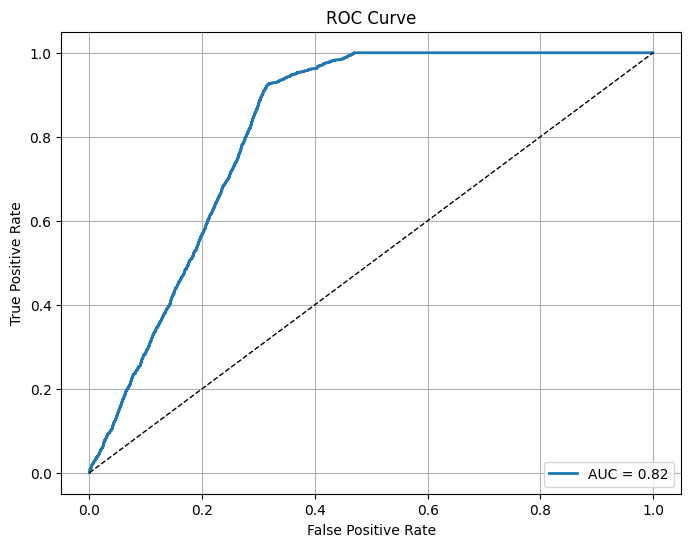

In [19]:
# 计算AUC并绘制ROC曲线
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # 对角线，表示随机分类器
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ROC曲线与AUC评分解析

## **ROC曲线（Receiver Operating Characteristic Curve）**
- **横轴**：假阳性率（False Positive Rate, FPR），即误判为正类的比例。  
  $$ FPR = \frac{FP}{FP + TN} $$  
- **纵轴**：真阳性率（True Positive Rate, TPR），即正确预测为正类的比例。  
  $$ TPR = \frac{TP}{TP + FN} $$

ROC曲线显示模型在不同**阈值**下的分类能力，曲线越接近左上角，模型表现越好。

## **AUC（Area Under the Curve）**
- AUC表示ROC曲线下的面积，数值范围在0.5到1之间。
  - **AUC = 1**：完美分类器。
  - **AUC = 0.5**：等同于随机猜测。
  - **AUC > 0.7**：模型表现良好。

## **如何解读**
- **AUC越大**，模型在不同阈值下的整体表现越优。
- **曲线越接近左上角**，说明模型能更好地平衡TPR与FPR，减少误判。

ROC和AUC帮助选择最佳阈值，确保在不同应用场景中性能最优。